# Data preparation

In [8]:
import sys
import pandas as pd
import numpy as np
import plotly.express as px
import plotly as py
import matplotlib.pyplot as plt 
import seaborn as sns 

from collections import Counter
from PIL import Image

import pandas as pd
from pathlib import Path

import calendar
!pip install termcolor
from termcolor import colored
from IPython.display import HTML

import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)


In [11]:
df=pd.read_csv("dataset-3.csv",header= 0,encoding= 'unicode_escape')
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [12]:
df.shape

(541909, 8)

This dataset contains 541,909 rows and 8 columns.


In [14]:
df.apply(lambda x: sum(x.isnull())) #Checking missing values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
#Replace null values in 2 column 'Description' and 'CustomerID' with 0
df['Description']=df['Description'].fillna(0) 
df['CustomerID']=df['CustomerID'].fillna(0) 

In [13]:
negative_values_check1 = (df['UnitPrice'] < 0).any()
negative_values_check2 = (df['Quantity'] < 0).any()
print(negative_values_check1)
print(negative_values_check2)

True
True


Both the Quantity and UnitPrice columns containe negative values. These negative values might stem from various factors such as canceled orders, potential fraudulent activities from competitor businesses, or errors related to customer visas or credit cards. As having negative sales quantities and prices are illogical, these negative values need to be removed from the dataset

In [14]:
df = df[(df['UnitPrice'] >= 0) & (df['Quantity'] >= 0)]

In [15]:
#remove duplicate invoice
duplicates = df[df.duplicated()]
df.drop_duplicates(inplace = True)
df.to_csv('cleaned_data.csv') #save cleaned dataset to new csv file name 'cleaned_data'

# Preliminary data

In [16]:
df=pd.read_csv('cleaned_data.csv')

#convert 'CustomerID' type into string
df['CustomerID']=df['CustomerID'].astype(str)
print(df['CustomerID'].dtype)

#create new column 'Sales amount' that equals to Unit price x quantity
df['Sales amount']=df['UnitPrice']*df['Quantity']

df.head()

object


Unnamed: 0 InvoiceNo StockCode                          Description  \
0           0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1           1    536365     71053                  WHITE METAL LANTERN   
2           2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3           3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4           4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   

   Quantity     InvoiceDate  UnitPrice CustomerID         Country  \
0         6  12/1/2010 8:26       2.55    17850.0  United Kingdom   
1         6  12/1/2010 8:26       3.39    17850.0  United Kingdom   
2         8  12/1/2010 8:26       2.75    17850.0  United Kingdom   
3         6  12/1/2010 8:26       3.39    17850.0  United Kingdom   
4         6  12/1/2010 8:26       3.39    17850.0  United Kingdom   

   Sales amount  
0         15.30  
1         20.34  
2         22.00  
3         20.34  
4         20.34

In [17]:
#Products, Transactions and Customers quantity summary
pd.DataFrame([{'Products': df['StockCode'].nunique(),    
               'Orders': df['InvoiceNo'].nunique(),
               'Customers': df['CustomerID'].nunique(),
               'Countries': df['Country'].nunique(),
              }], columns = ['Products', 'Orders', 'Customers','Countries'], index = ['quantity'])

Products  Orders  Customers  Countries
quantity      3941   20728       4340         38

Based on the preliminary data analysis:
- Transactions: There were a total of 20,728 transactions recorded.
- Products: These transactions involved 3,941 unique products.
- Customers: A total of 4,340 unique customers made these transactions.
- Countries: Transactions originated from customers in 38 diffmerent countries.

These insights summarize the key metrics from the preliminary data analysis, highlighting the scale and diversity of transactions, products, customers, and geographic spread represented in the dataset

In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Month_Year'] = df['InvoiceDate'].dt.strftime('%B %Y')
df['HourOfDay'] = df['InvoiceDate'].dt.hour
df.head()

Unnamed: 0 InvoiceNo StockCode                          Description  \
0           0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1           1    536365     71053                  WHITE METAL LANTERN   
2           2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3           3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4           4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   

   Quantity         InvoiceDate  UnitPrice CustomerID         Country  \
0         6 2010-12-01 08:26:00       2.55    17850.0  United Kingdom   
1         6 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   
2         8 2010-12-01 08:26:00       2.75    17850.0  United Kingdom   
3         6 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   
4         6 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   

   Sales amount  DayOfWeek     Month_Year  HourOfDay  
0         15.30  Wednesday  December 2010          8  
1         20.34  Wednesday  December 2010          8  
2         22.00  Wednesday  December 2010          8  
3         20.34  Wednesday  December 2010          8  
4         20.34  Wednesday  December 2010          8

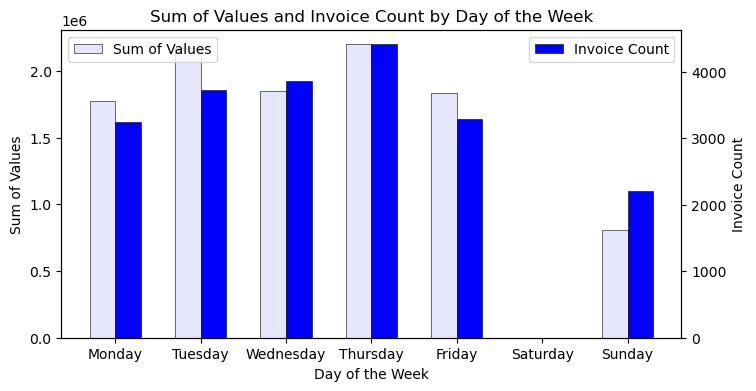

In [19]:
DayOfWeek_invoice_count = df.groupby('DayOfWeek')['InvoiceNo'].nunique()
DayOfWeek_values_sum = df.groupby('DayOfWeek')['Sales amount'].sum()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] 
DayOfWeek_invoice_count = DayOfWeek_invoice_count.reindex(days_order)
DayOfWeek_values_sum = DayOfWeek_values_sum.reindex(days_order)

fig, ax1 = plt.subplots(figsize=(8, 4))

ax2 = ax1.twinx()
bar_width = 0.3
index = np.arange(len(days_order))

bar1 = ax1.bar(index, DayOfWeek_values_sum, bar_width, label='Sum of Values', color='lavender', edgecolor='black', linewidth=0.4)
bar2 = ax2.bar(index + bar_width, DayOfWeek_invoice_count, bar_width, label='Invoice Count', color='blue', edgecolor='black', linewidth=0.4)

ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Sum of Values')
ax2.set_ylabel('Invoice Count')
ax1.set_title('Sum of Values and Invoice Count by Day of the Week')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(days_order)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.yaxis.label.set_color('black')
ax2.yaxis.label.set_color('black')

plt.show()

The distribution of transactions across various days exhibits variability, notably showcasing the highest aggregate purchase volume on Thursday. Conversely, Saturday registers no transactions within this dataset.

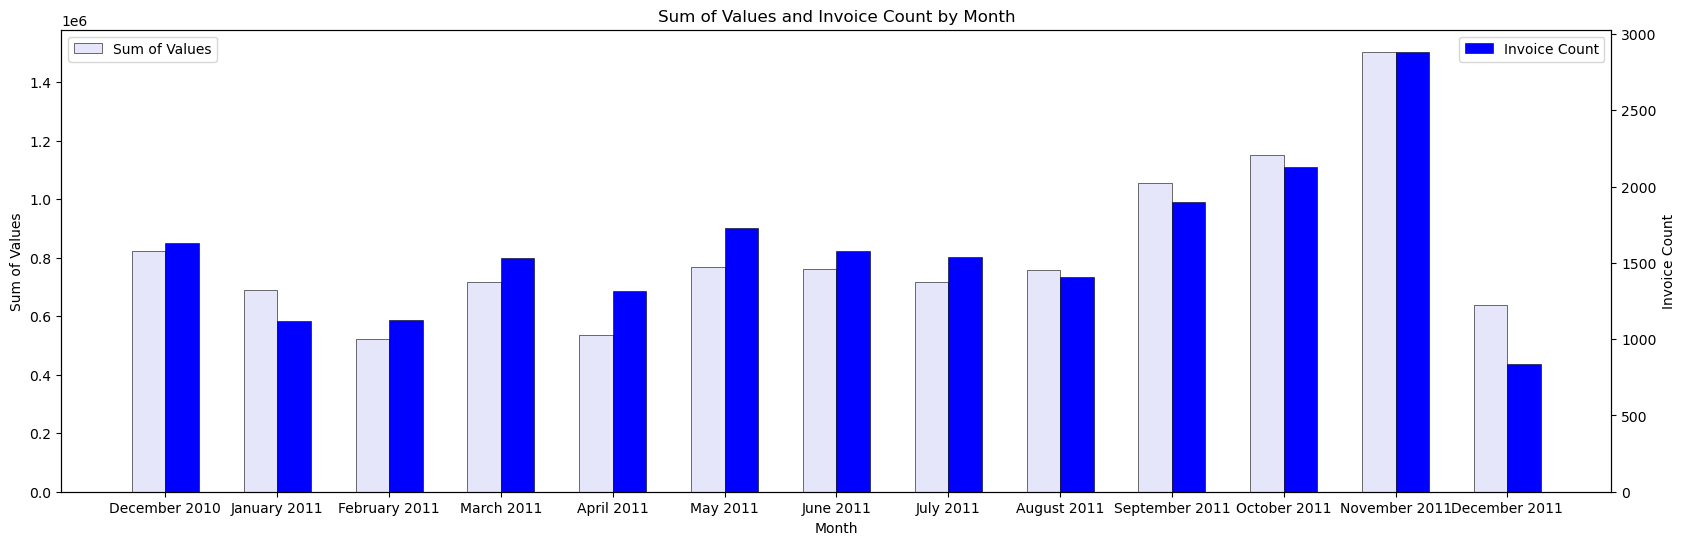

In [20]:
# no. of transactions for month

month_order = df['Month_Year'].unique()
Month_invoice_count = df.groupby(['Month_Year'])['InvoiceNo'].nunique()
Month_values_sum = df.groupby(['Month_Year'])['Sales amount'].sum()
Month_invoice_count.index = pd.to_datetime(Month_invoice_count.index, format='%B %Y')
Month_values_sum.index = pd.to_datetime(Month_values_sum.index, format='%B %Y')

month_order = df['Month_Year'].unique()

# Sort by index (which is now in datetime format)
Month_invoice_count = Month_invoice_count.sort_index()
Month_values_sum = Month_values_sum.sort_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(20, 6))

ax2 = ax1.twinx()
bar_width = 0.3
index = np.arange(len(month_order)) 

bar1 = ax1.bar(index, Month_values_sum, bar_width, label='Sum of Values', color='lavender', edgecolor='black', linewidth=0.4)
bar2 = ax2.bar(index + bar_width, Month_invoice_count, bar_width, label='Invoice Count', color='blue', edgecolor='black', linewidth=0.4)

ax1.set_xlabel('Month')
ax1.set_ylabel('Sum of Values', color='b')
ax2.set_ylabel('Invoice Count', color='r')
ax1.set_title('Sum of Values and Invoice Count by Month')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(month_order)  # Using 'month_order' for x-axis labeling
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.yaxis.label.set_color('black')
ax2.yaxis.label.set_color('black')

plt.show()

When conducting a month-to-month analysis, there is a noticeable disparity in the quantity of transactions per month. Specifically, November 2011 recorded 2,760 transactions, whereas the subsequent month, December, observed a substantial decrease to just 813 transactions. This variance in purchase volumes across months could stem from diverse factors such as seasonal shopping demands, promotional activities, among other potential influences.

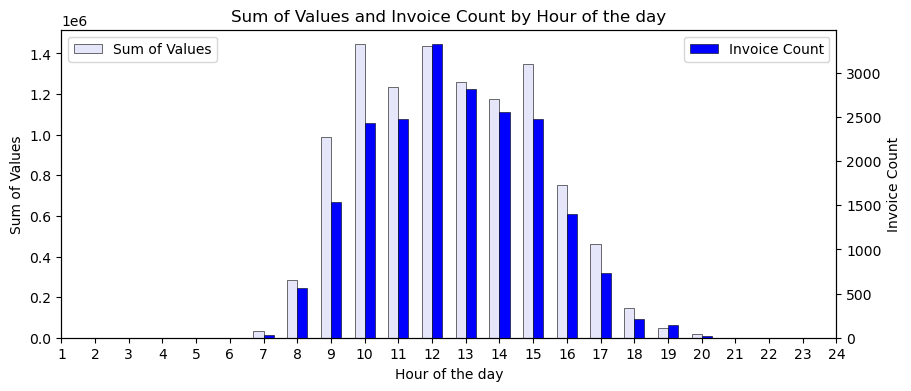

In [21]:
# no. of transactions for hour
HourOfDay_invoice_count = df.groupby('HourOfDay')['InvoiceNo'].nunique()
HourOfDay_values_sum = df.groupby('HourOfDay')['Sales amount'].sum()

hour_array = np.arange(1, 25)
HourOfDay_invoice_count = HourOfDay_invoice_count.reindex(hour_array)
HourOfDay_values_sum = HourOfDay_values_sum.reindex(hour_array)

fig, ax1 = plt.subplots(figsize=(10, 4))

ax2 = ax1.twinx()
bar_width = 0.3
index = np.arange(len(hour_array))

bar1 = ax1.bar(index, HourOfDay_values_sum, bar_width, label='Sum of Values', color='lavender', edgecolor='black', linewidth=0.4)
bar2 = ax2.bar(index + bar_width, HourOfDay_invoice_count, bar_width, label='Invoice Count', color='blue', edgecolor='black', linewidth=0.4)

ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('Sum of Values', color='b')
ax2.set_ylabel('Invoice Count', color='r')
ax1.set_title('Sum of Values and Invoice Count by Hour of the day')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(hour_array)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.yaxis.label.set_color('black')
ax2.yaxis.label.set_color('black')

plt.show()

The result shows that customer shopping activity peaks between 9 AM and 3 PM, with the highest values and invoice counts occurring from 10 AM to 1 PM. There is minimal activity from 1 AM to 6 AM and after 4 PM, indicating a midday shopping preference. 

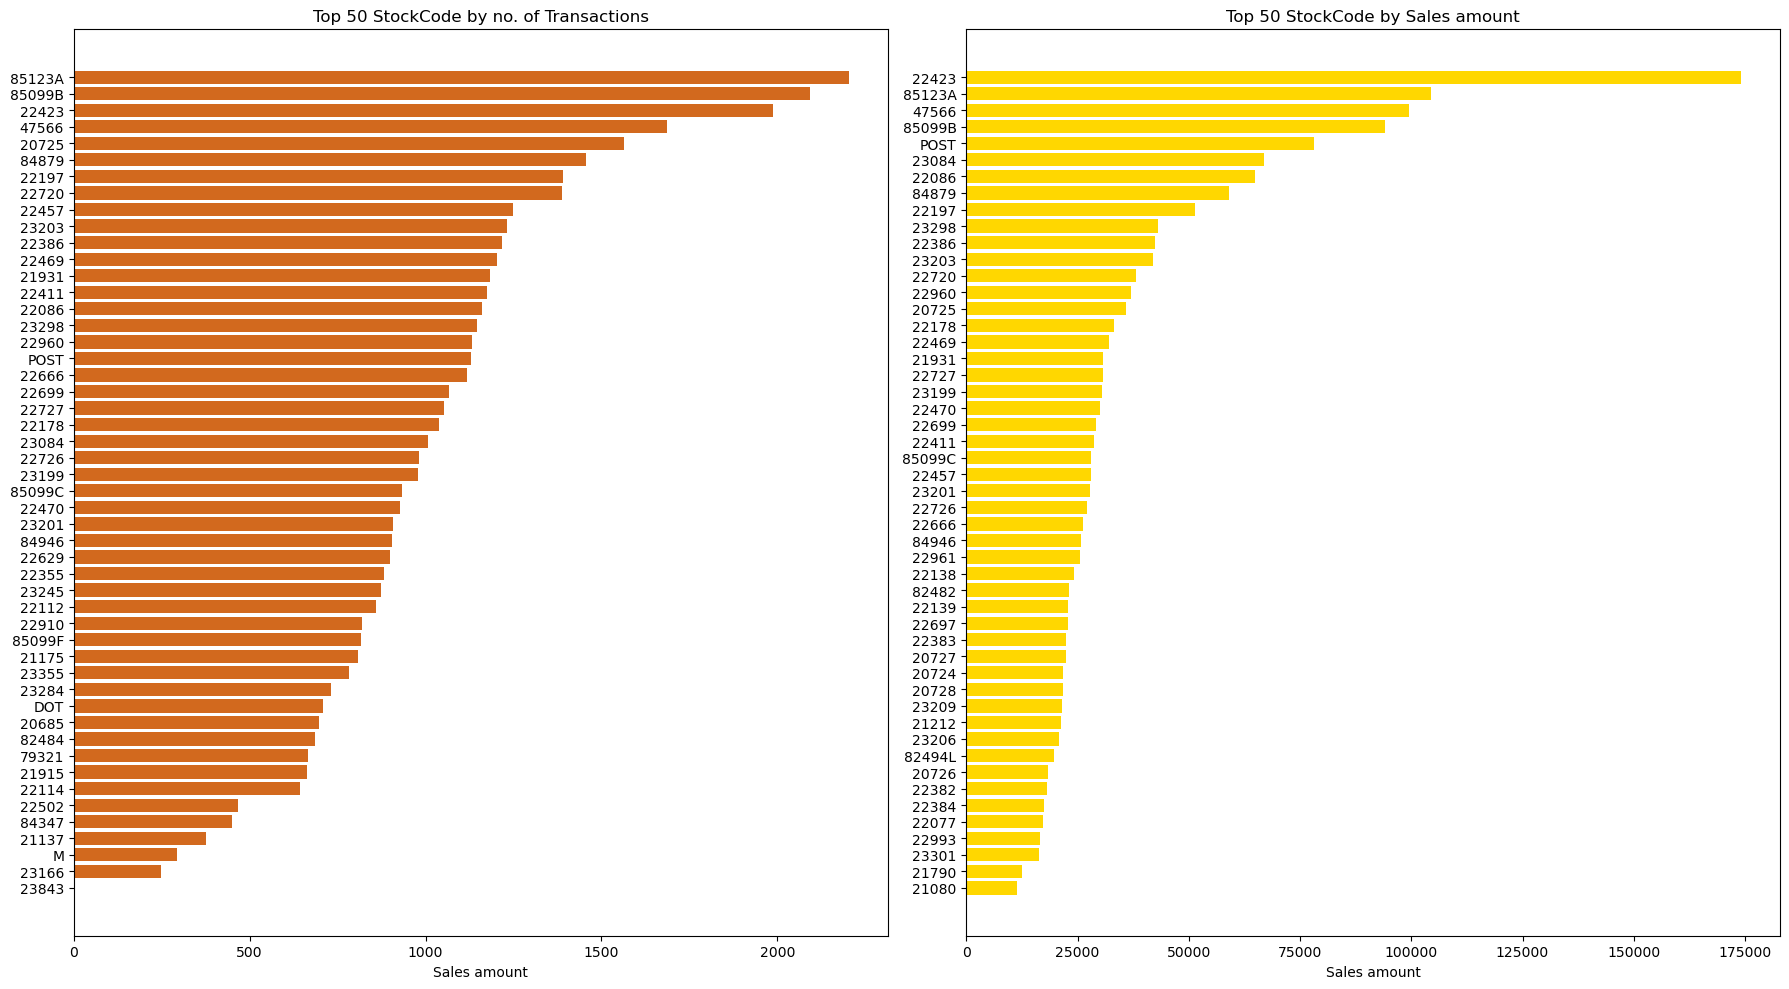

In [22]:
# Top purchased products
stockcode = df.groupby('StockCode').agg({
    'Sales amount': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

# Sorting by Quantity and Values
stockcode_qty = stockcode.sort_values(by='InvoiceNo', ascending=False).reset_index()
stockcode_values = stockcode.sort_values(by='Sales amount', ascending=False).reset_index()

# Selecting top 20 for Quantity and Values
top_10_qty = stockcode_qty.head(50)
top_10_values = stockcode_values.head(50)

# Convert StockCode to string if it's not already
top_10_qty['StockCode'] = top_10_qty['StockCode'].astype(str)
top_10_values['StockCode'] = top_10_values['StockCode'].astype(str)

# Plotting top 20 StockCode based on Values and Quantity
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
top_10_values = top_10_values.sort_values('InvoiceNo', ascending=True)  
plt.barh(top_10_values['StockCode'], top_10_values['InvoiceNo'], color='chocolate')
plt.xlabel('Sales amount')
plt.title('Top 50 StockCode by no. of Transactions')

plt.subplot(1, 2, 2)
top_10_qty = top_10_qty.sort_values('Sales amount', ascending=True)  
plt.barh(top_10_qty['StockCode'], top_10_qty['Sales amount'], color='gold')
plt.xlabel('Sales amount')
plt.title('Top 50 StockCode by Sales amount')

plt.tight_layout()
plt.show()


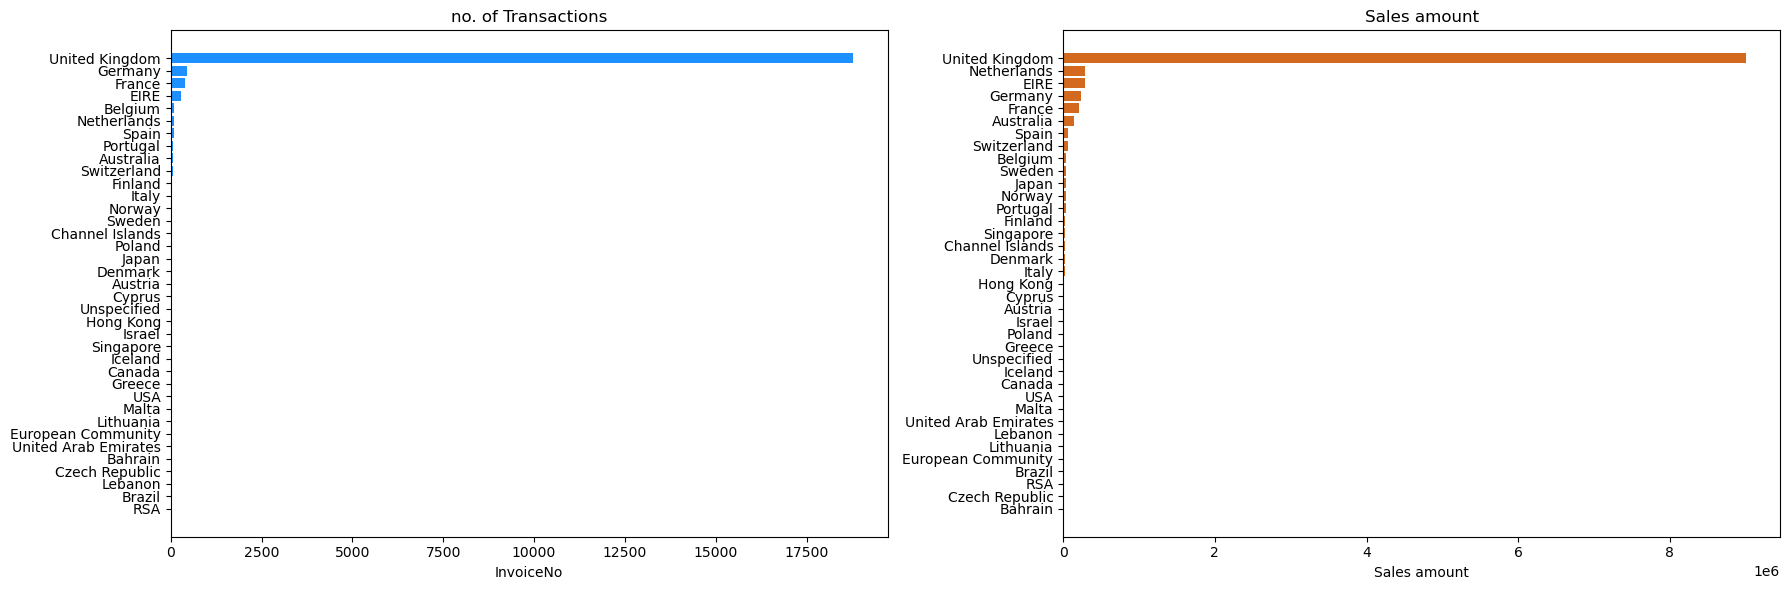

In [23]:
# Top Country   
customer = df.groupby('Country').agg({
    'Sales amount': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

# Sorting by Quantity and Values
customer_qty = customer.sort_values(by='InvoiceNo', ascending=False).reset_index()
customer_values = customer.sort_values(by='Sales amount', ascending=False).reset_index()

# Selecting top 20 for Quantity and Values
top_20_qty = customer_qty.head(37)
top_20_values = customer_values.head(37)

# Convert StockCode to string if it's not already
top_20_qty['Country'] = top_20_qty['Country'].astype(str)
top_20_values['Country'] = top_20_values['Country'].astype(str)

# Plotting top 20 StockCode based on Values and Quantity
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
top_20_values = top_20_values.sort_values('InvoiceNo', ascending=True)  # Sort by Values in ascending order
plt.barh(top_20_values['Country'], top_20_values['InvoiceNo'], color='dodgerblue')
plt.xlabel('InvoiceNo')
plt.title('no. of Transactions')

plt.subplot(1, 2, 2)
top_20_qty = top_20_qty.sort_values('Sales amount', ascending=True)  # Sort by Quantity in ascending order
plt.barh(top_20_qty['Country'], top_20_qty['Sales amount'], color='chocolate')
plt.xlabel('Sales amount')
plt.title('Sales amount')

plt.tight_layout()
plt.show()

The United Kingdom overwhelmingly leads in both the number of transactions and sales amount, indicating it is the dominant market and contributes the majority of transactions and sales. This also suggests a concentrated market with potential for targeted marketing and resource allocation.

There is a noticeable presence in other European countries like Germany, France, and the Netherlands, but the volume is much lower, indicating potential growth opportunities in these regions.

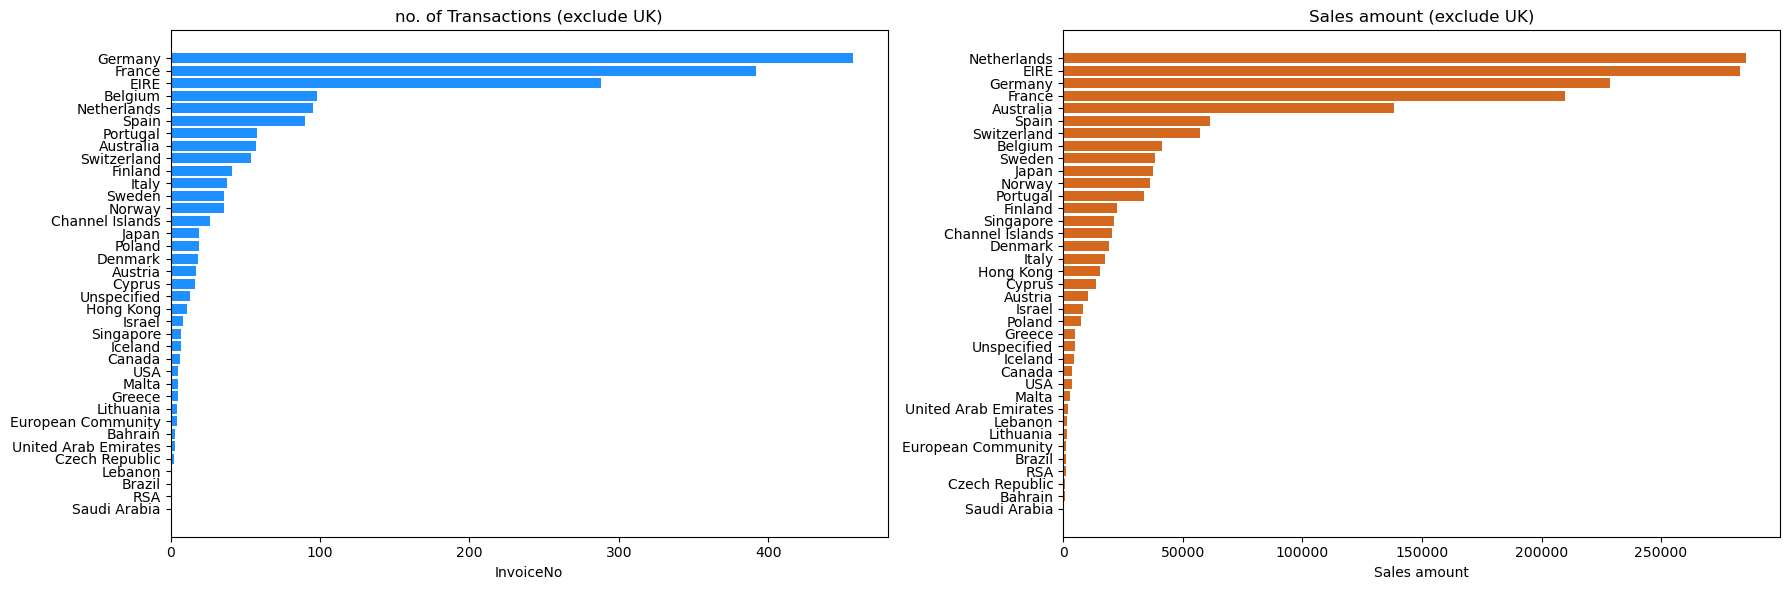

In [24]:
# Top Country exclude UK
customer = df.groupby('Country').agg({
    'Sales amount': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

# Sorting by Quantity and Values
customer_qty = customer.sort_values(by='InvoiceNo', ascending=False).reset_index()
customer_values = customer.sort_values(by='Sales amount', ascending=False).reset_index()
customer_qty = customer_qty[customer_qty['Country'] != 'United Kingdom']
customer_values = customer_values[customer_values['Country'] != 'United Kingdom']


# Selecting top 20 for Quantity and Values
top_20_qty = customer_qty.head(37)
top_20_values = customer_values.head(37)

# Convert StockCode to string if it's not already
top_20_qty['Country'] = top_20_qty['Country'].astype(str)
top_20_values['Country'] = top_20_values['Country'].astype(str)

# Plotting top 20 StockCode based on Values and Quantity
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
top_20_values = top_20_values.sort_values('InvoiceNo', ascending=True)  # Sort by Values in ascending order
plt.barh(top_20_values['Country'], top_20_values['InvoiceNo'], color='dodgerblue')
plt.xlabel('InvoiceNo')
plt.title('no. of Transactions (exclude UK)')

plt.subplot(1, 2, 2)
top_20_qty = top_20_qty.sort_values('Sales amount', ascending=True)  # Sort by Quantity in ascending order
plt.barh(top_20_qty['Country'], top_20_qty['Sales amount'], color='chocolate')
plt.xlabel('Sales amount')
plt.title('Sales amount (exclude UK)')

plt.tight_layout()
plt.show()


Germany, France, and Ireland lead in transaction volumes, while the Netherlands and Ireland top the sales amounts, followed by Germany and France. This suggests strong market engagement in these countries. Notably, Australia, Spain, and Switzerland also show substantial sales, indicating promising growth opportunities. Businesses should focus marketing and resource allocation on these high-performing countries to maximize revenue and market presence.

# Recency Frequency Monetary value 

In [25]:
from datetime import datetime
import datetime as dt

df["InvoiceDate"] = df["InvoiceDate"].dt.date
snapshot_date = max(df.InvoiceDate) + dt.timedelta(days=1)

# RFM table
# Aggregate data by each customer
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Sales amount': lambda x: x.sum()}).reset_index()
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)

# Rename columns
rfm.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Sales amount': 'MonetaryValue'}, inplace=True)

rfm.head()

CustomerID  Recency  Frequency  MonetaryValue
0        0.0        1     133320     1754901.91
1    12346.0      326          1       77183.60
2    12347.0        3        182        4310.00
3    12348.0       76         31        1797.24
4    12349.0       19         73        1757.55

- Recency indicates how much time elapsed since a customer last order.
- Frequency indicates how many times a customer ordered.
- Monetary value tells us how much a customer has spent purchasing items

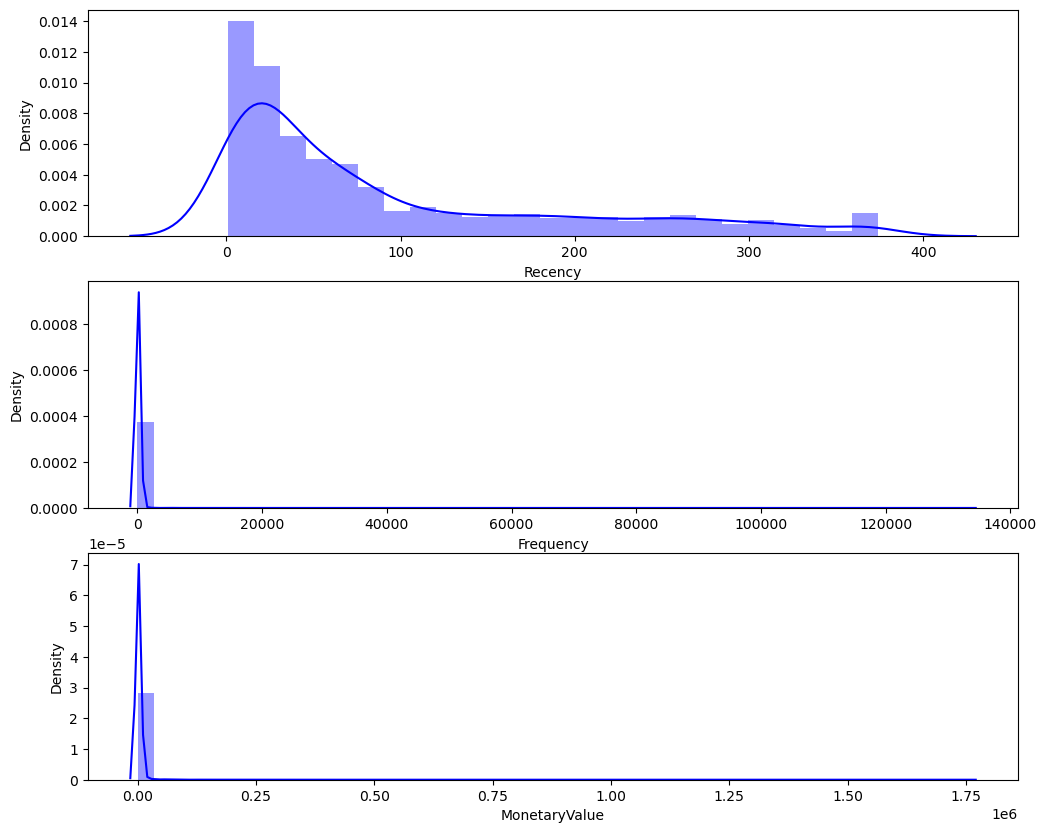

In [26]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1)
sns.distplot(rfm['Recency'],color='blue')
plt.subplot(3, 1, 2) 
sns.distplot(rfm['Frequency'], color='blue')
plt.subplot(3, 1, 3)
sns.distplot(rfm['MonetaryValue'], color='blue')
plt.show()

In [27]:
#Dividing RFM data into four quartiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75]) 
quantiles = quantiles.to_dict() 

# R_Score should be minimum so 1st quantile is set as 1.
def R_Score(a,b,c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]: 
        return 3
    else:
        return 4
    
# The higher the F_Score,M_Score the better so 1st quantile is set as 4.    
def FM_Score(x,y,z):
    if x <= z[y][0.25]:
        return 4
    elif x <= z[y][0.50]:
        return 3
    elif x <= z[y][0.75]: 
        return 2
    else:
        return 1

# New column for R_Score to indicate numerical score between 1 to 4.
rfm['R_Score'] = rfm['Recency'].apply(R_Score, args=('Recency',quantiles))
# New column for F_Score to indicate numerical score between 1 to 4.
rfm['F_Score'] = rfm['Frequency'].apply(FM_Score, args=('Frequency',quantiles))
# New column for M_Score to indicate numerical score between 1 to 4.
rfm['M_Score'] = rfm['MonetaryValue'].apply(FM_Score, args=('MonetaryValue',quantiles))
rfm.head()

CustomerID  Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score
0        0.0        1     133320     1754901.91        1        1        1
1    12346.0      326          1       77183.60        4        4        1
2    12347.0        3        182        4310.00        1        1        1
3    12348.0       76         31        1797.24        3        3        1
4    12349.0       19         73        1757.55        2        2        1

In [28]:
#Adding R,F,M Scores to one new column
rfm['RFM_Score'] = rfm.R_Score.astype(str)+ rfm.F_Score.astype(str) + rfm.M_Score.astype(str)
rfm.head()

CustomerID  Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
0        0.0        1     133320     1754901.91        1        1        1   
1    12346.0      326          1       77183.60        4        4        1   
2    12347.0        3        182        4310.00        1        1        1   
3    12348.0       76         31        1797.24        3        3        1   
4    12349.0       19         73        1757.55        2        2        1   

  RFM_Score  
0       111  
1       441  
2       111  
3       331  
4       221

In [29]:
# Calculate RFM_Score
rfm['RFM_Total_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)
rfm['RFM_Total_Score'].unique()

array([ 3,  9,  7,  5, 11, 12,  8,  4,  6, 10], dtype=int64)

In [30]:
# Define rfm_level function
def RFM_Total_Score(df):

    if (df['RFM_Total_Score'] >= 11):# For RFM score with values 11,12
        return 'Champions' 
    elif (df['RFM_Total_Score'] == 10):# For RFM score with value 10
        return 'Loyal Customers' 
    elif (df['RFM_Total_Score'] == 9): # For RFM score with value 9
        return 'Recent Customers'
    elif (df['RFM_Total_Score'] == 8): # For RFM score with value 8
         return 'Promising'
    elif (df['RFM_Total_Score'] == 7): # For RFM score with value 7
        return 'Customers Needing Attention'
    elif (df['RFM_Total_Score'] == 6): # For RFM score with value 6
        return 'Cant lose them'
    elif (df['RFM_Total_Score'] == 5): # For RFM score with value 5
        return 'At Risk'
    else:                               # For RFM score with value less than 5
        
        return 'Lost'
# Create a new variable RFM_Level
rfm['Customer_Segmentation'] =rfm.apply(RFM_Total_Score, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

CustomerID  Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
0        0.0        1     133320     1754901.91        1        1        1   
1    12346.0      326          1       77183.60        4        4        1   
2    12347.0        3        182        4310.00        1        1        1   
3    12348.0       76         31        1797.24        3        3        1   
4    12349.0       19         73        1757.55        2        2        1   

  RFM_Score  RFM_Total_Score        Customer_Segmentation  
0       111                3                         Lost  
1       441                9             Recent Customers  
2       111                3                         Lost  
3       331                7  Customers Needing Attention  
4       221                5                      At Risk

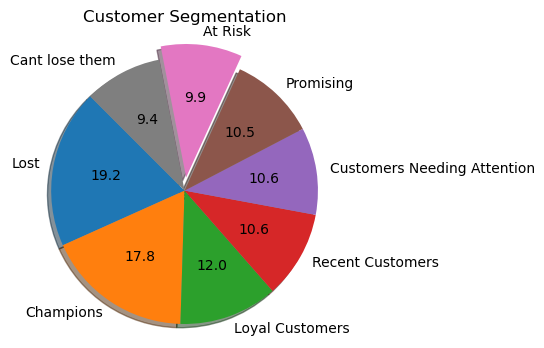

In [31]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm['Customer_Segmentation'].value_counts().plot.pie(figsize=(4,4),startangle=135, explode=(0,0,0,0,0,0,0.1,0),autopct='%.1f',shadow=True)
plt.title("Customer Segmentation",size=12)
plt.ylabel(" ")
plt.axis('equal') 
plt.show()

Since total customers are divided into 9 segments, it can be seen that 19.6% of customers are already lost, accounting for the largest portion of the customers. To be worth noticing, 9.9% customers are at risk of losing them as customers and 9.6% customers we can't lose. 

In [32]:
#op 10 Churned best customers who has not purchased anything in a while
churned=rfm[(rfm['RFM_Score']=='411')].sort_values('M_Score', ascending=False).head(10)
churned

CustomerID  Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
32      12383.0      185         99        1850.56        4        1        1   
124     12501.0      337        149        2169.39        4        1        1   
4301    18231.0      193        123        2071.77        4        1        1   
4018    17850.0      373        297        5391.21        4        1        1   
3979    17787.0      153        128        1817.54        4        1        1   
3766    17504.0      207        127        2997.03        4        1        1   
3726    17444.0      148        135        2940.04        4        1        1   
3697    17406.0      334        111        2184.42        4        1        1   
3641    17337.0      152        521        1981.06        4        1        1   
3357    16919.0      157        326        2592.25        4        1        1   

     RFM_Score  RFM_Total_Score Customer_Segmentation  
32         411                6        Cant lose them  
124        411                6        Cant lose them  
4301       411                6        Cant lose them  
4018       411                6        Cant lose them  
3979       411                6        Cant lose them  
3766       411                6        Cant lose them  
3726       411                6        Cant lose them  
3697       411                6        Cant lose them  
3641       411                6        Cant lose them  
3357       411                6        Cant lose them

These customers used to place orders with huge amounts very frequently but they did not place orders from almost a year which means they are purchasing from other companies. These groups of people should be targeted with offers to gain them back

In [46]:
rfm[(rfm['RFM_Score']=='144')|(rfm['RFM_Score']=='143')].sort_values('M_Score', ascending=False).head(10)

CustomerID  Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
20      12367.0        5         11         168.90        1        4        4   
3133    16620.0        4          9         178.96        1        4        4   
3115    16596.0       16         12         250.15        1        4        4   
3097    16569.0        4          5         124.20        1        4        4   
3070    16528.0        4         17         244.41        1        4        4   
2907    16313.0        4         16         274.15        1        4        4   
2825    16189.0       16         11         215.48        1        4        4   
2675    15992.0        4          3          41.99        1        4        4   
2528    15783.0       11         14         246.30        1        4        4   
2417    15634.0       18         15         243.55        1        4        4   

     RFM_Score  RFM_Total_Score Customer_Segmentation  Cluster  
20         144                9      Recent Customers        2  
3133       144                9      Recent Customers        3  
3115       144                9      Recent Customers        3  
3097       144                9      Recent Customers        3  
3070       144                9      Recent Customers        3  
2907       144                9      Recent Customers        3  
2825       144                9      Recent Customers        3  
2675       144                9      Recent Customers        3  
2528       144                9      Recent Customers        3  
2417       144                9      Recent Customers        3

In [48]:
rfm.to_csv('rfm_data.csv')

The above customers has the potential to become best customers this people should be targeted to convert them into loyal customers.All these different segment of customers should be targeted with different tailored advertisments and rewards for increased profits and more responsiveness from customers.

# Clustering

In [34]:
rfm.head()

CustomerID  Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
0        0.0        1     133320     1754901.91        1        1        1   
1    12346.0      326          1       77183.60        4        4        1   
2    12347.0        3        182        4310.00        1        1        1   
3    12348.0       76         31        1797.24        3        3        1   
4    12349.0       19         73        1757.55        2        2        1   

  RFM_Score  RFM_Total_Score        Customer_Segmentation  
0       111                3                         Lost  
1       441                9             Recent Customers  
2       111                3                         Lost  
3       331                7  Customers Needing Attention  
4       221                5                      At Risk

In [35]:
# Import library
from sklearn.preprocessing import StandardScaler

# Subset the columns to be normalized
columns_to_normalize = ['CustomerID','Recency', 'Frequency', 'MonetaryValue']
rfm_subset = rfm[columns_to_normalize]

# Initialize the Object
scaler = StandardScaler()

# Fit and Transform The Data
customers_normalized = scaler.fit_transform(rfm_subset)

# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis=0).round(2)) 
print(customers_normalized.std(axis=0).round(2))


[ 0.  0. -0. -0.]
[1. 1. 1. 1.]


In [36]:
pd.DataFrame(customers_normalized).head()

0         1          2          3
0 -8.805795 -0.920254  65.465410  62.410036
1 -1.698485  2.329926  -0.059082   2.661415
2 -1.697909 -0.900253   0.029877   0.066165
3 -1.697333 -0.170212  -0.044337  -0.023322
4 -1.696758 -0.740244  -0.023695  -0.024735

## ELbow Methodology - K-value optimizing

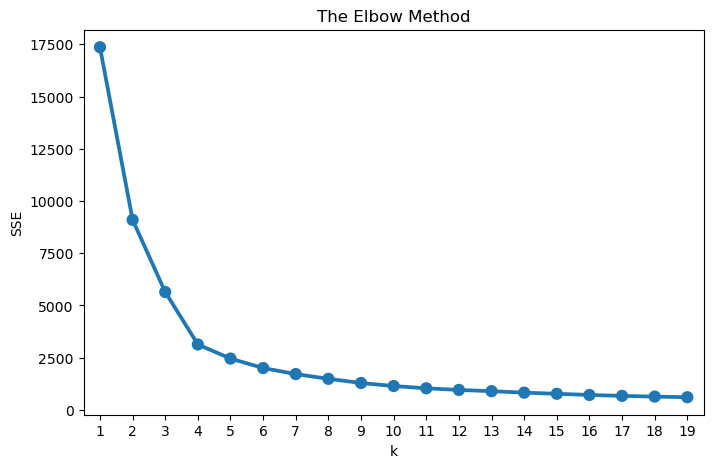

In [37]:
plt.figure(figsize=(8,5))

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1, 20)

distortions = []
inertias = []
mapping1 = {}
sse = {}
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    
    distortions.append(sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / customers_normalized.shape[0])
    inertias.append(kmeans.inertia_)
 
    mapping1[k] = sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / customers_normalized.shape[0]
    
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [38]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

rfm["Cluster"] = model.labels_
rfm.head()
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         261.5      26.8         638.4   929
1           1.0  133320.0     1754901.9     1
2          46.5     113.4        2627.1  1706
3          47.8     102.3        2237.3  1704

In [39]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['CustomerID','Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = rfm.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

CustomerID   Recency  Frequency  MonetaryValue  ID  Cluster
0   -8.805795 -0.920254  65.465410      62.410036   0        1
1   -1.698485  2.329926  -0.059082       2.661415   1        0
2   -1.697909 -0.900253   0.029877       0.066165   2        2
3   -1.697333 -0.170212  -0.044337      -0.023322   3        2
4   -1.696758 -0.740244  -0.023695      -0.024735   4        2

In [40]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

ID  Cluster Attribute     Value
0   0        1   Recency -0.920254
1   1        0   Recency  2.329926
2   2        2   Recency -0.900253
3   3        2   Recency -0.170212
4   4        2   Recency -0.740244

In [41]:
# Aggregate data by each customer
fig3 = df_nor_melt.groupby('Cluster').agg({'ID': lambda x: len(x)}).reset_index()

# Rename columns
fig3.rename(columns={'ID': 'Count'}, inplace=True)
fig3['percent'] = (fig3['Count'] / fig3['Count'].sum()) * 100
fig3['percent'] = fig3['percent'].round(1)

fig3.head()

Cluster  Count  percent
0        0   2787     21.4
1        1      3      0.0
2        2   5118     39.3
3        3   5112     39.3

In [42]:
#Creating a Treemap with Plotly Express
# colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
colors=['#5296cf','#7ab7b7','#f1f1f1','#f1d4d4'] #color palette
import plotly.express as px

fig = px.treemap(fig3, path=['Cluster'],values='Count'
                 , width=800, height=400
                 ,title="Distribution of Cluster")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [43]:
rfm_fig = rfm.copy()

#Remove the outlier for visualization
y1 = rfm_fig['Frequency']
size = rfm_fig.shape[0]
removed_outliers = y1.between(y1.quantile(.05), y1.quantile(.95))
print(str(y1[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

#Remove the outlier for visualization
y2 = rfm_fig['Recency']
size = rfm_fig.shape[0]
removed_outliers = y2.between(y2.quantile(.05), y2.quantile(.95))
print(str(y2[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

#Remove the outlier for visualization
y3 = rfm_fig['MonetaryValue']
size = rfm_fig.shape[0]
removed_outliers = y3.between(y3.quantile(.05), y3.quantile(.95))
print(str(y3[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

3943/4340 data points remain.
3581/3943 data points remain.
3223/3581 data points remain.


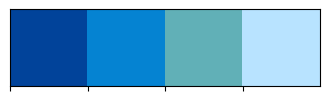

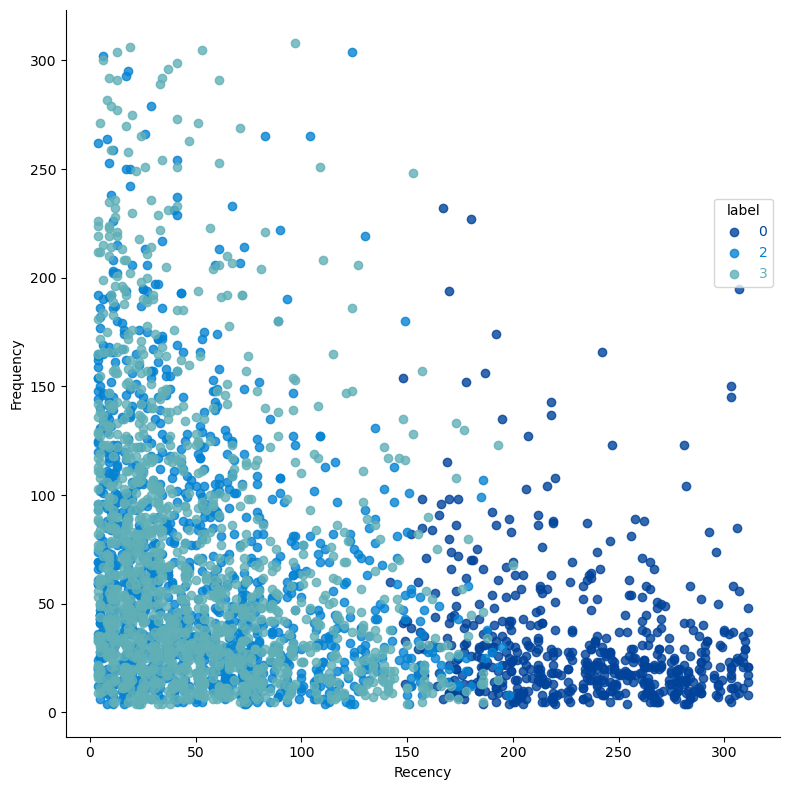

In [44]:
#define a custom palette
customPalette = ['#01439A', '#0583D2', '#61B0B7', '#B8E3FF']
sns.set_palette(customPalette)
sns.palplot(customPalette)

data = pd.DataFrame(data=rfm_fig,columns=['Customer ID','Cluster','Recency','Frequency','MonetaryValue'])

#plot data with seaborn 
facet = sns.lmplot(data=data, x='Recency', y='Frequency', hue='Cluster', height=8,
                   fit_reg=False, legend=False)
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                          title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

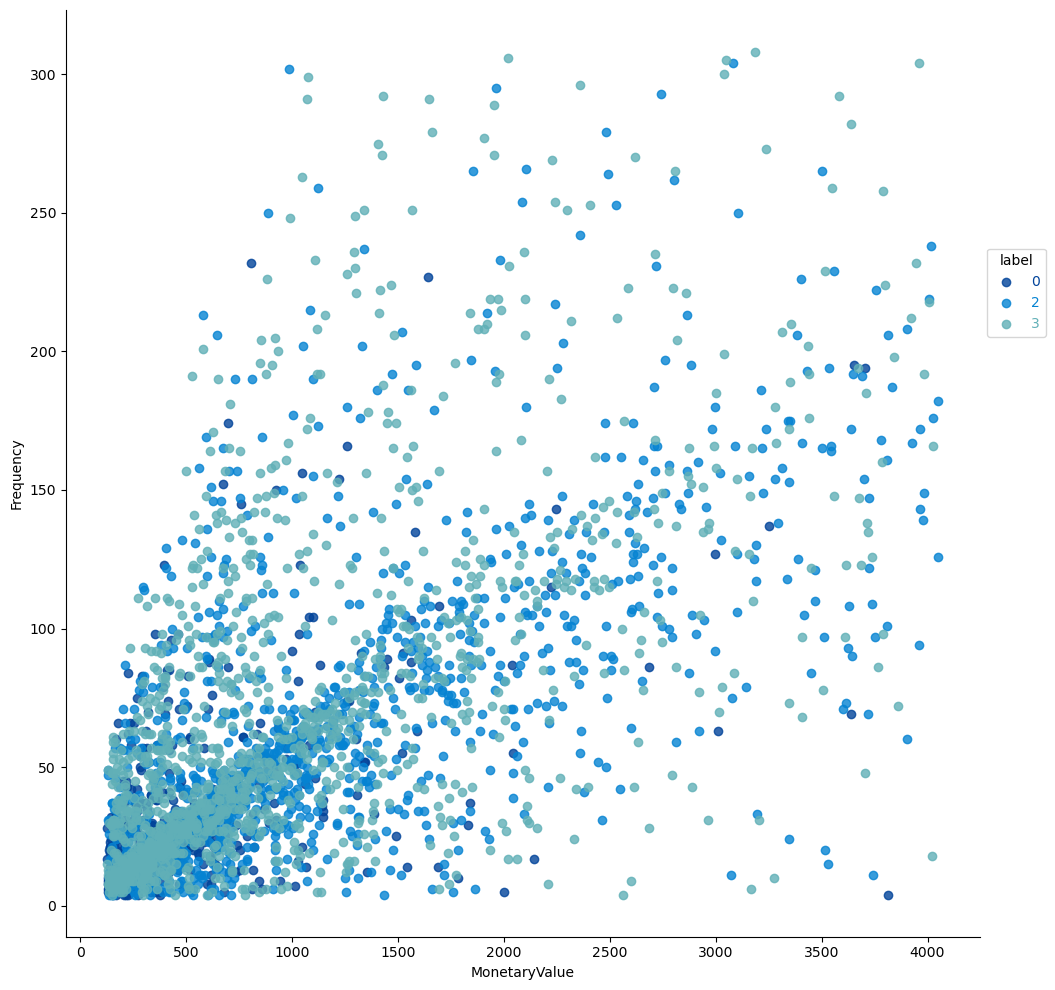

In [49]:
# fig, ax = plt.subplots(figsize=(10, 8))
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='MonetaryValue', y='Frequency', hue='Cluster', height=10,
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

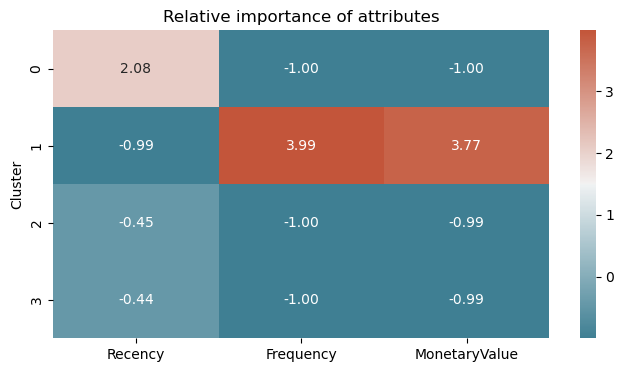

In [50]:
rfm_fig['Cluster'] = rfm_fig['Cluster'].astype(str)

import plotly.express as px
fig = px.scatter_3d(rfm_fig,x='Recency', y='Frequency', z='MonetaryValue',
              color='Cluster', opacity=0.7,color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

cluster_avg = rfm[['Cluster','Recency','Frequency','MonetaryValue']].groupby(['Cluster']).mean()
population_avg = rfm[['Recency','Frequency','MonetaryValue']].head().mean()

cluster_avg
population_avg

relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

cmap = sns.diverging_palette(220, 20, as_cmap=True)
# Plot heatmap
plt.figure(figsize=(8, 4))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap=cmap)
plt.show()

# Word Frequency

In [51]:
import collections
import json

import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')

# Create a set of stop words 
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cmanh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
descriptionData = df[['Description','InvoiceDate','Country']]
descriptionData.head()

Description InvoiceDate         Country
0   WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01  United Kingdom
1                  WHITE METAL LANTERN  2010-12-01  United Kingdom
2       CREAM CUPID HEARTS COAT HANGER  2010-12-01  United Kingdom
3  KNITTED UNION FLAG HOT WATER BOTTLE  2010-12-01  United Kingdom
4       RED WOOLLY HOTTIE WHITE HEART.  2010-12-01  United Kingdom

In [53]:
descriptionData['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [54]:
descriptionWords = []

for row in descriptionData['Description']:
    for word in str(row).split(' '):
        descriptionWords.append(word)

In [56]:
pd.value_counts(np.array(descriptionWords)).sort_values(ascending=False).head()

       134625
SET     53095
OF      52040
BAG     50856
RED     41770
dtype: int64

In [57]:
wordDict_Country = collections.defaultdict(list)

for _,row in descriptionData.iterrows():
    for w in str(row['Description']).split(' '):
        if (w.lower() in stop_words) or w.lower() == '' or w.lower() == 'set':
            continue

        wordDict_Country[row['Country']].append(w)
    # wordDict_Country[row['Country']].append(i for i in [w for w in str(row['Description']).split(' ')])

In [58]:
dictCount = {}
for country in wordDict_Country:
    dictCount[country] = pd.Series(wordDict_Country[country]).value_counts().sort_values(ascending=False).head(20)

dictCount

{'United Kingdom': BAG          46676
 RED          36879
 HEART        36160
 VINTAGE      30341
 RETROSPOT    29936
 PINK         26398
 DESIGN       26386
 CHRISTMAS    23112
 BOX          21174
 METAL        19628
 JUMBO        19512
 WHITE        19259
 CAKE         18347
 BLUE         17316
 SIGN         16183
 3            16125
 LUNCH        15983
 HANGING      15715
 HOLDER       14982
 PACK         13619
 dtype: int64,
 'France': RED          1170
 RETROSPOT     996
 BAG           995
 LUNCH         633
 DESIGN        587
 SPACEBOY      484
 BOX           474
 VINTAGE       472
 PINK          411
 PAPER         386
 WOODLAND      360
 TIN           346
 DOLLY         346
 PACK          335
 CHILDRENS     331
 GIRL          325
 MINI          312
 POLKADOT      309
 POSTAGE       300
 CAKE          294
 dtype: int64,
 'Australia': BAG          125
 RED          122
 RETROSPOT    107
 VINTAGE      103
 DESIGN        87
 PINK          81
 LUNCH         75
 PAPER         57
 SPAC

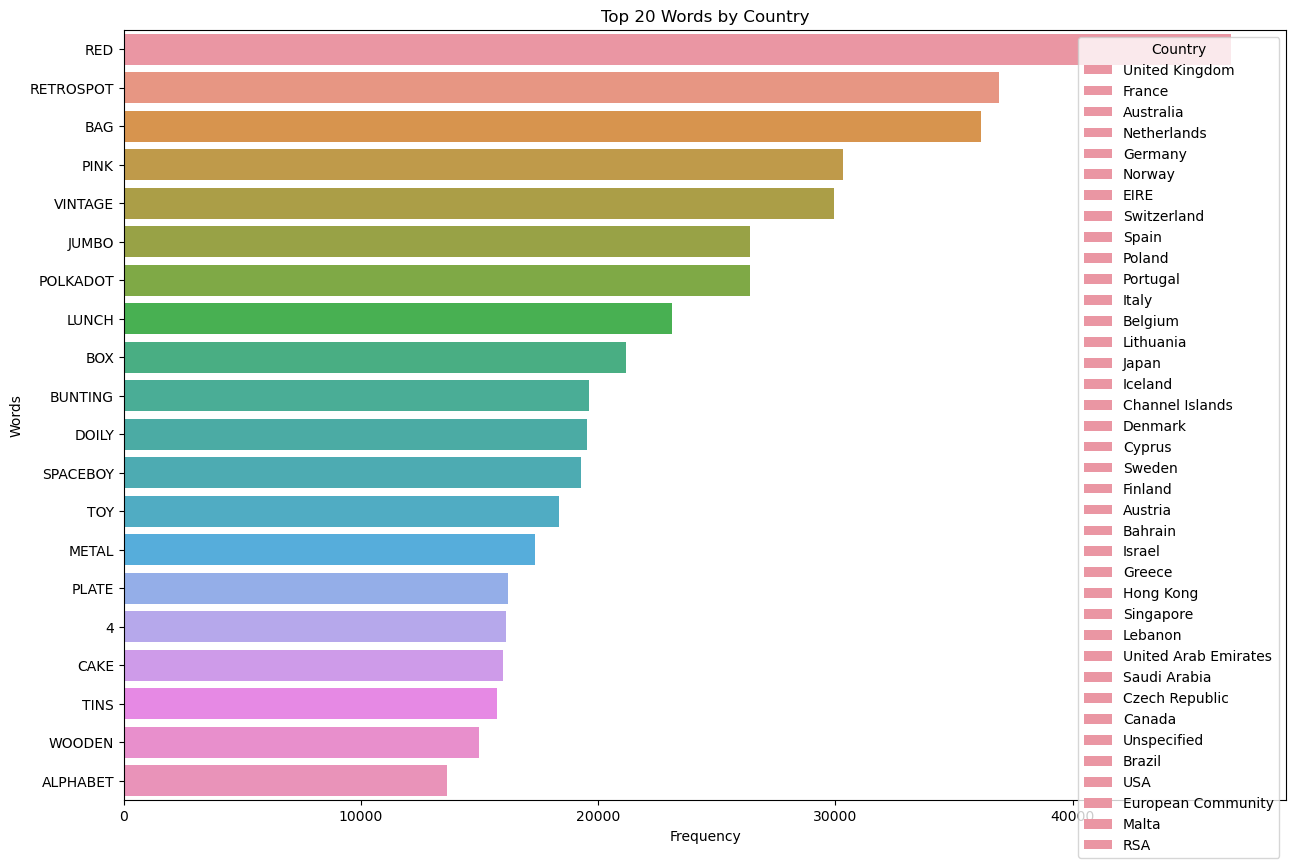

In [59]:
# Save the results to a file
with open("frequencyResult.txt", 'w') as f:  
    for key, value in dictCount.items():  
        f.write('%s:%s\n' % (key, value))

# Plot the word frequency chart for each country
plt.figure(figsize=(15, 10))

for country, word_counts in dictCount.items():
    sns.barplot(x=word_counts.values, y=word_counts.index, label=country)

plt.title('Top 20 Words by Country')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.legend(title='Country')
plt.show()

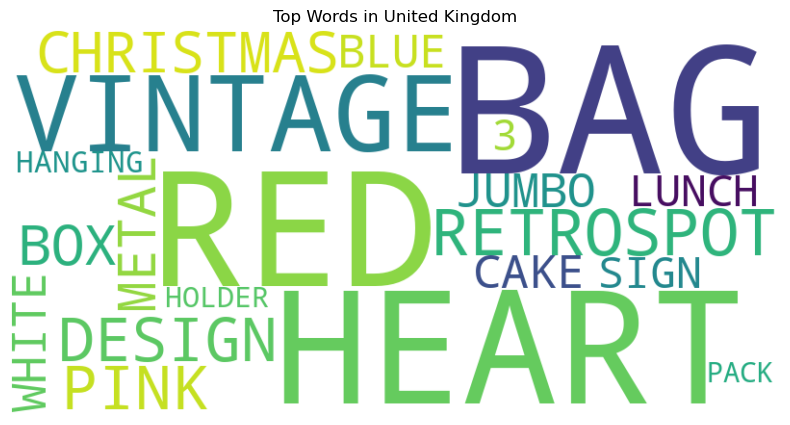

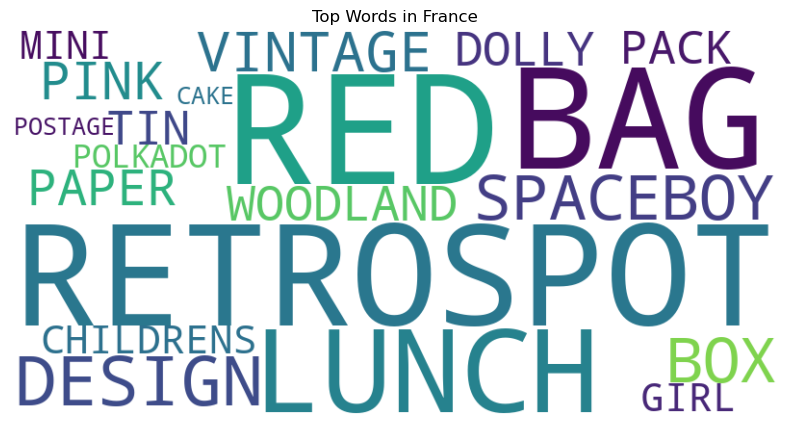

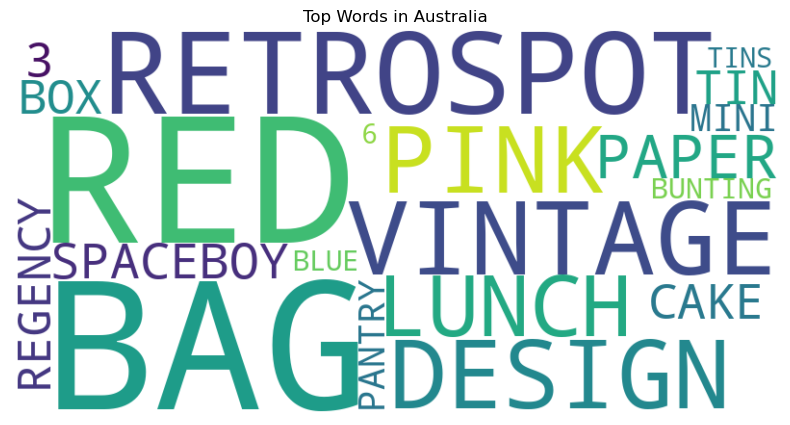

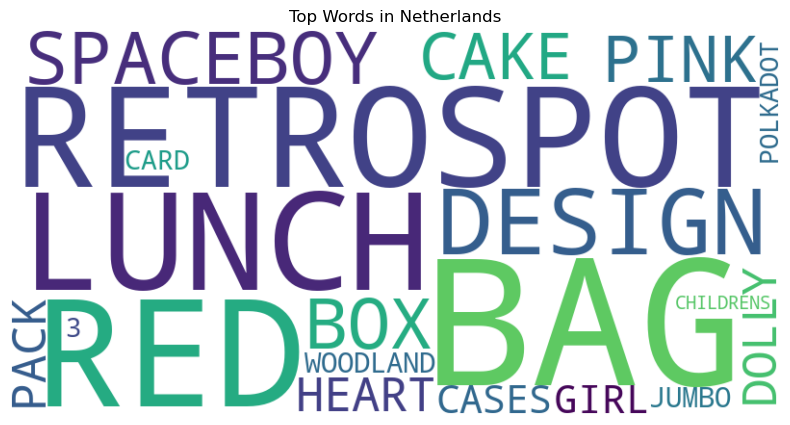

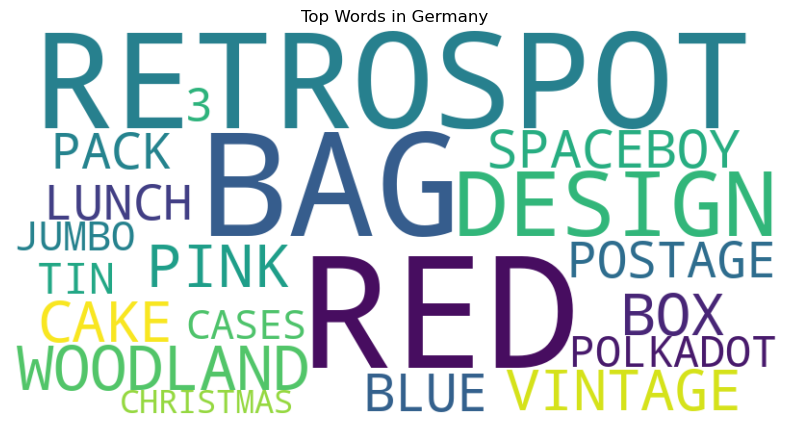

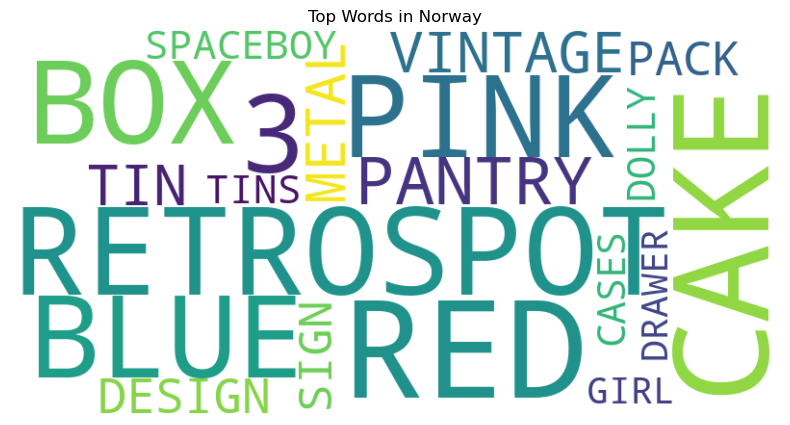

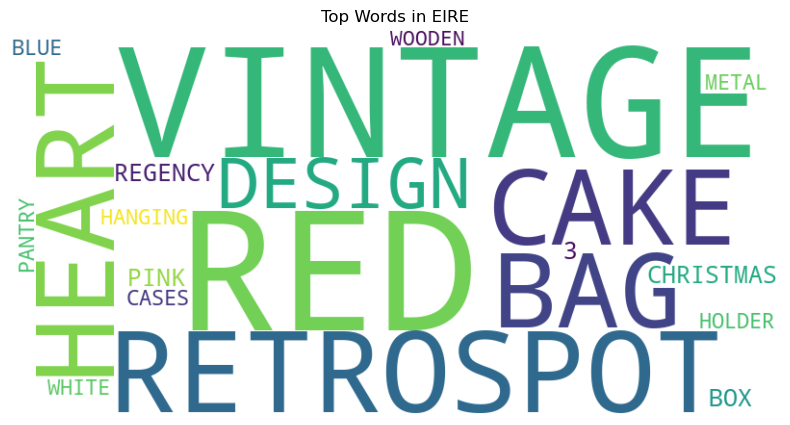

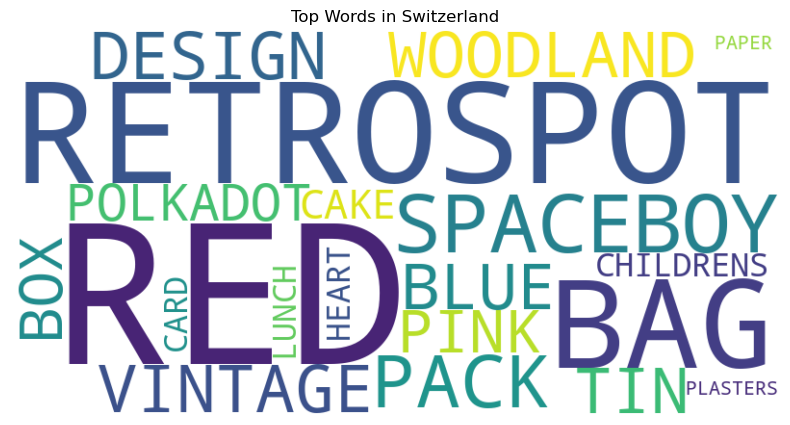

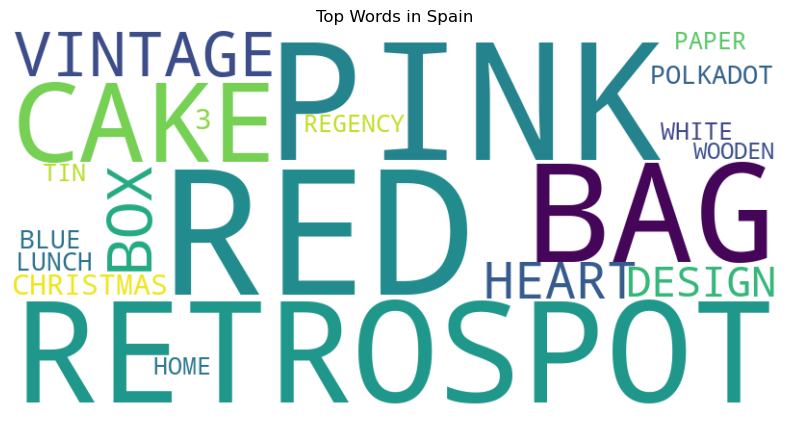

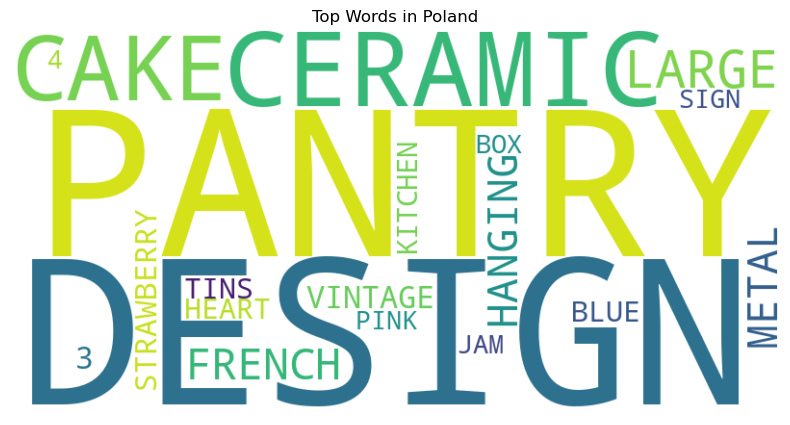

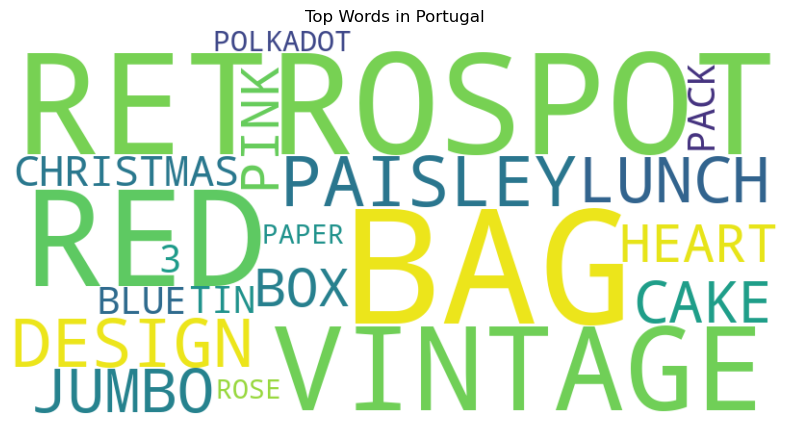

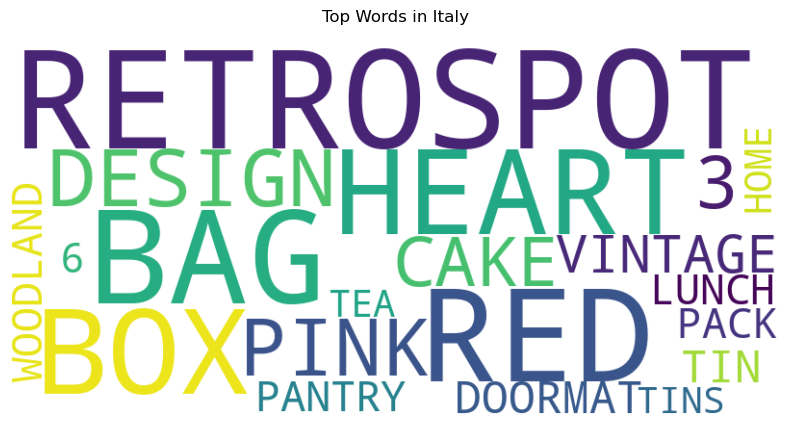

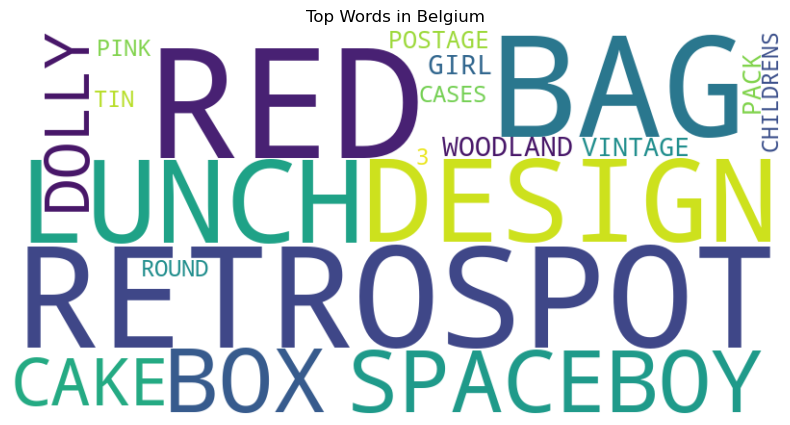

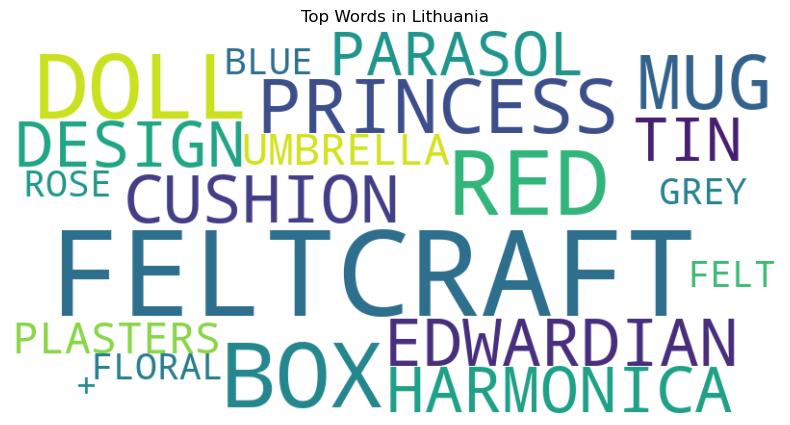

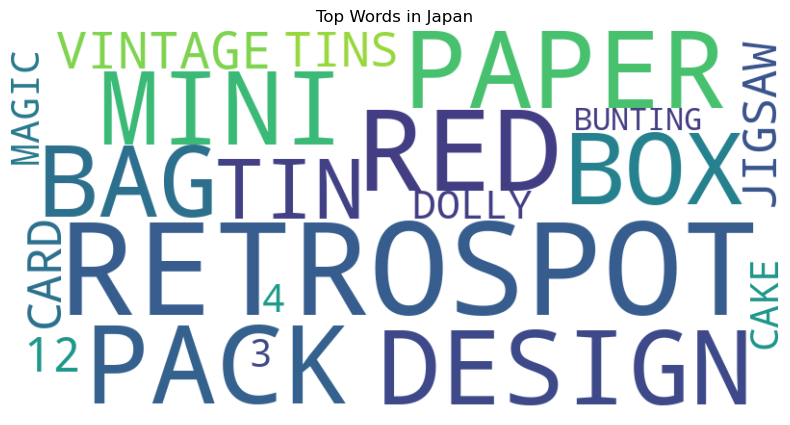

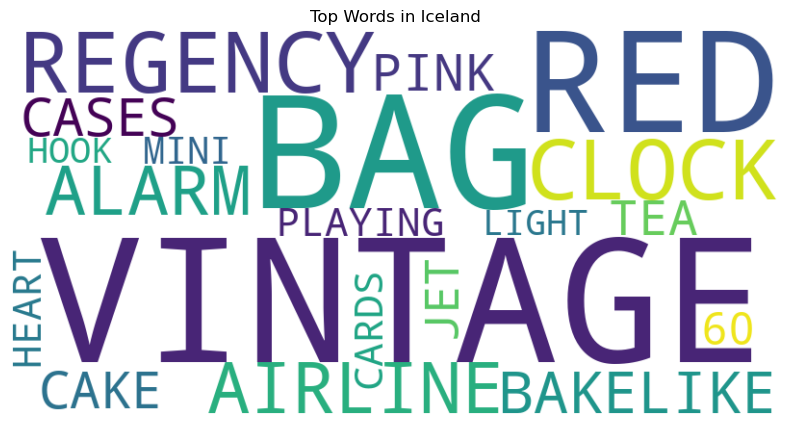

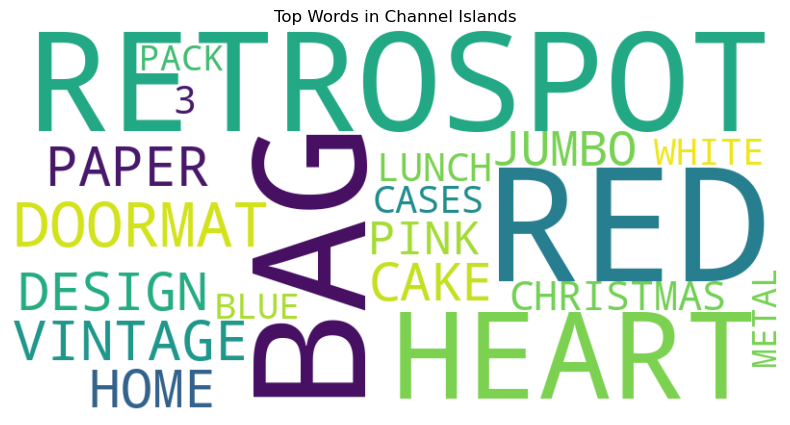

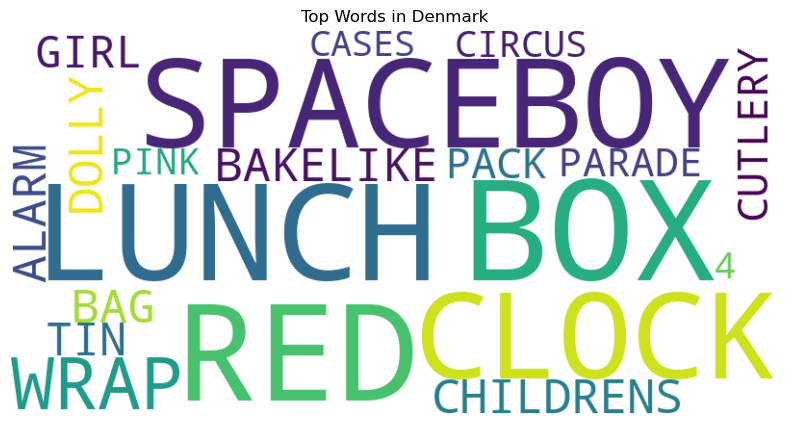

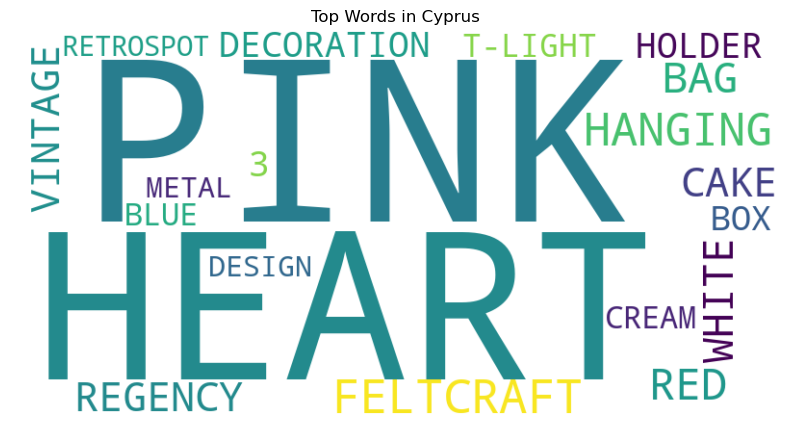

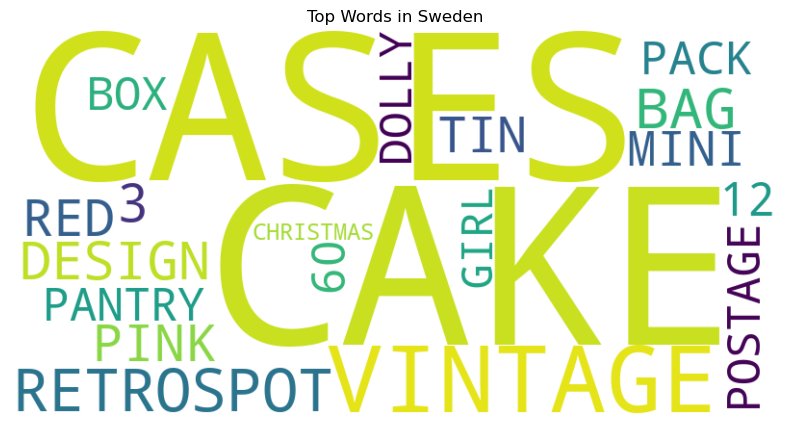

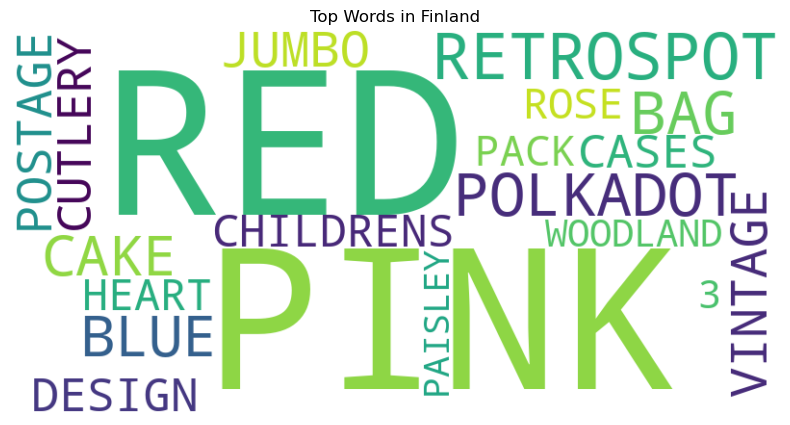

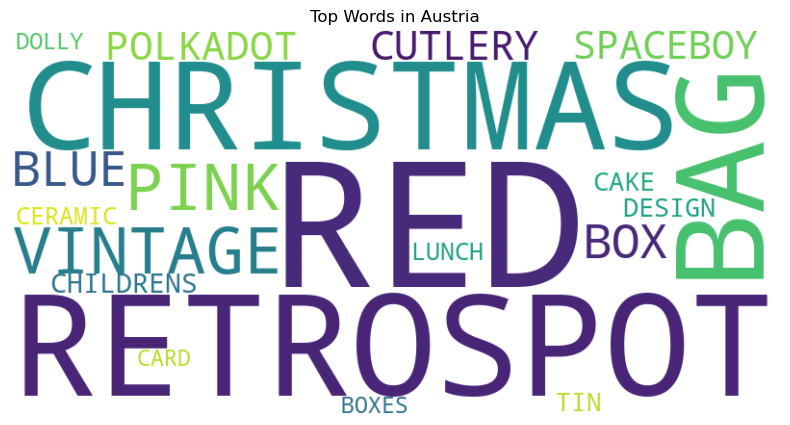

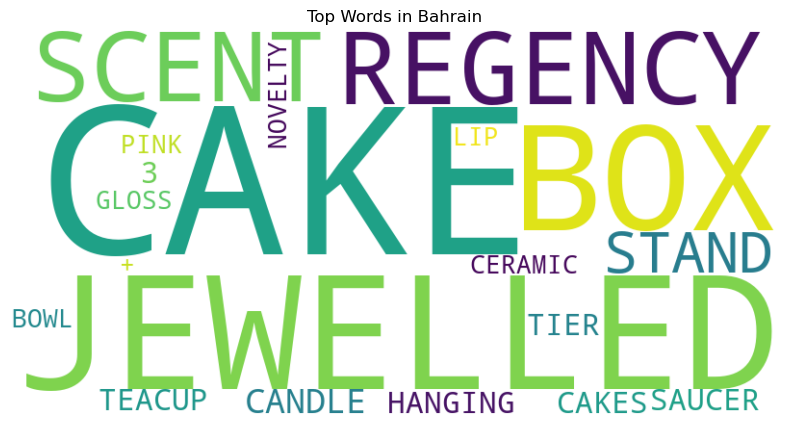

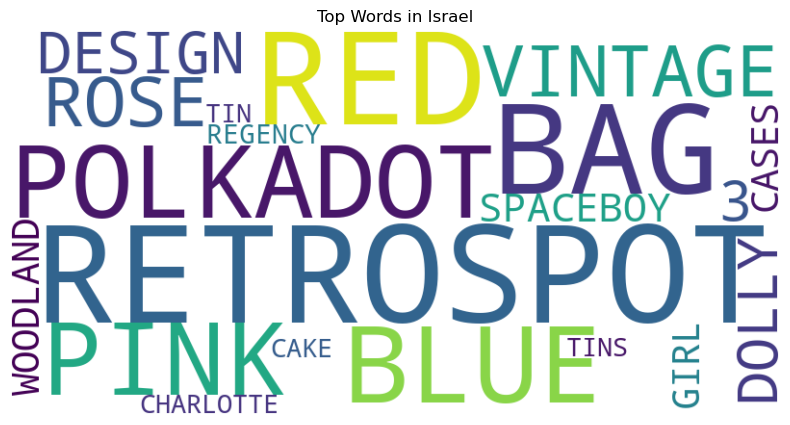

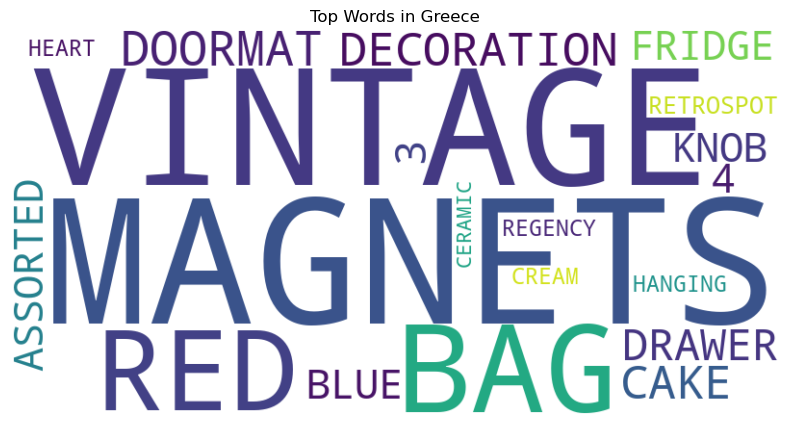

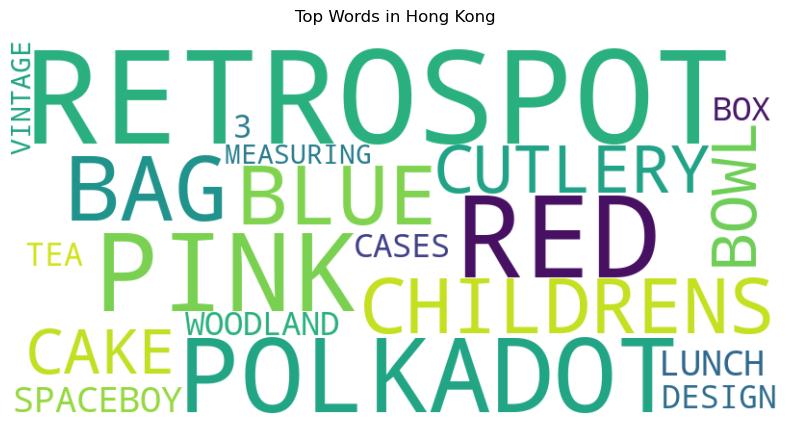

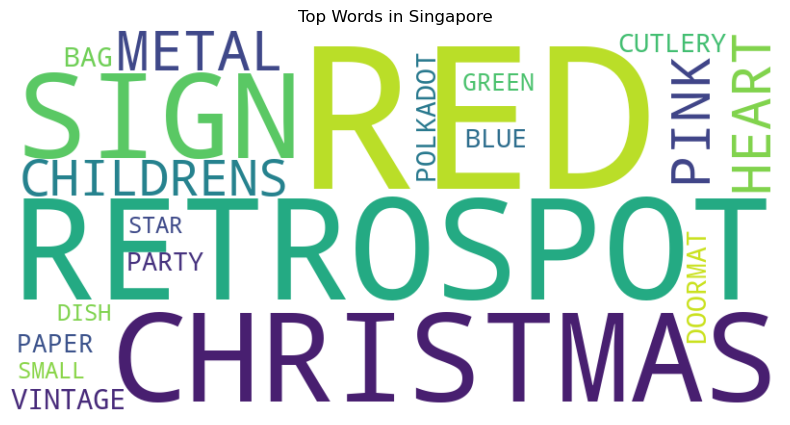

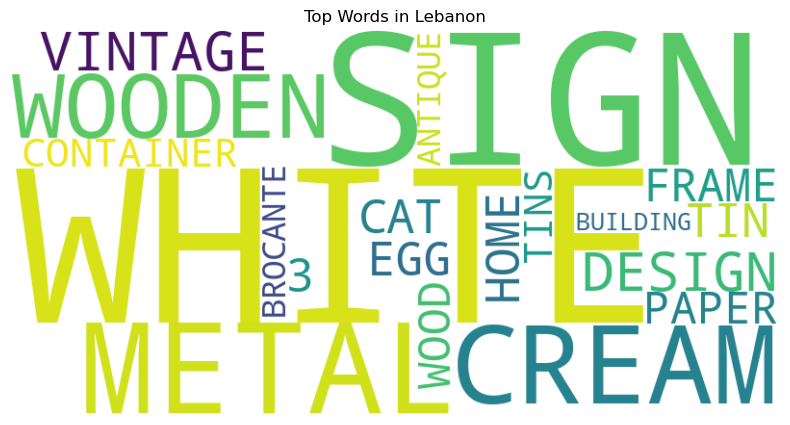

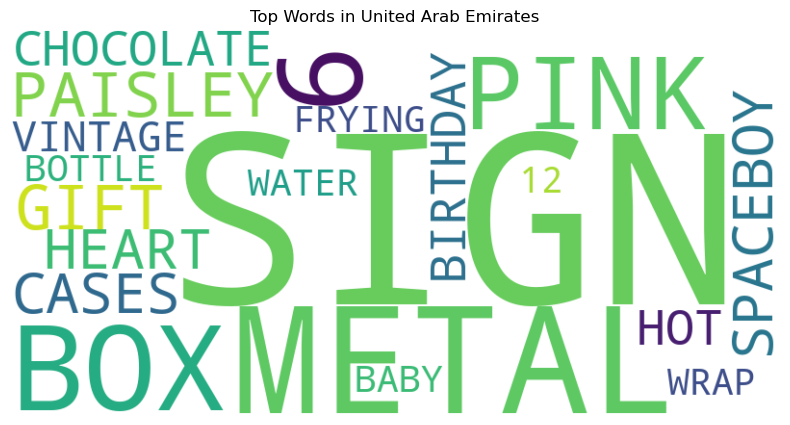

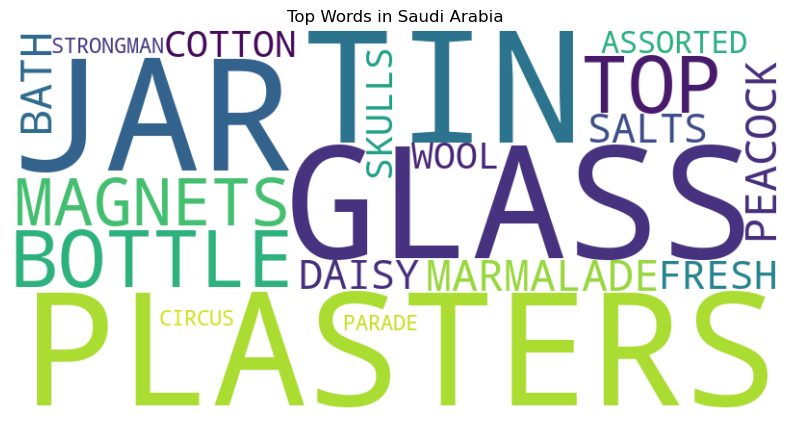

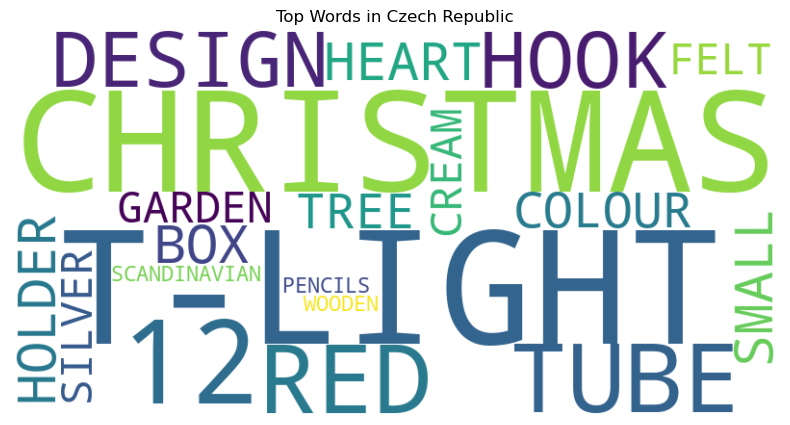

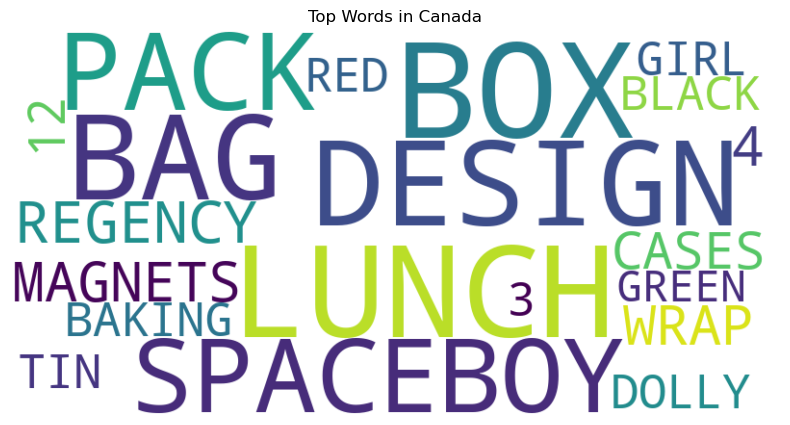

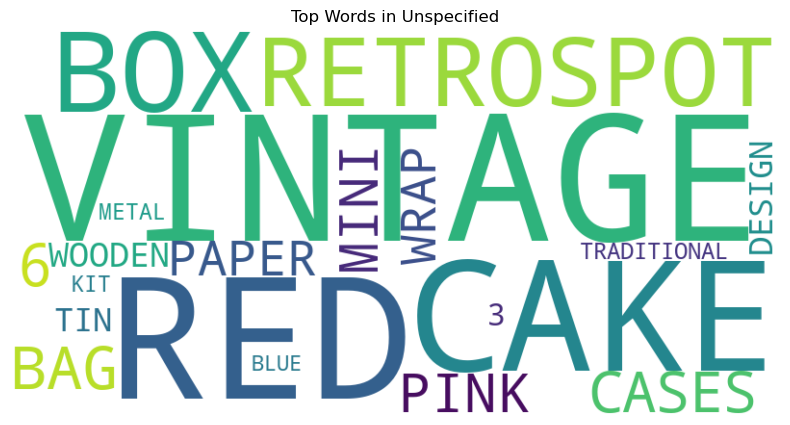

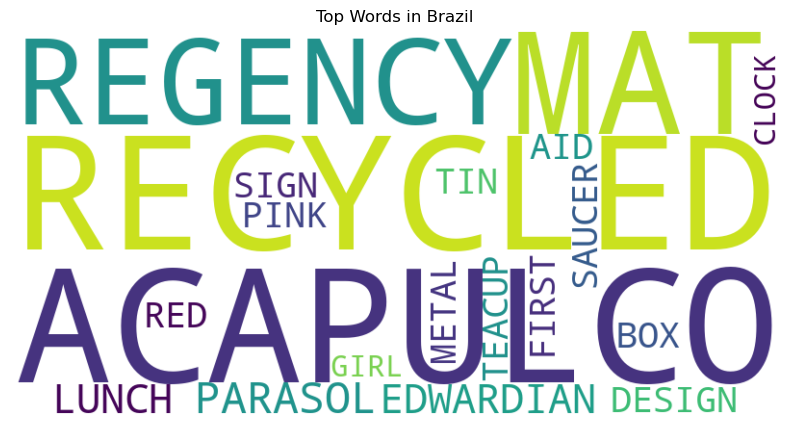

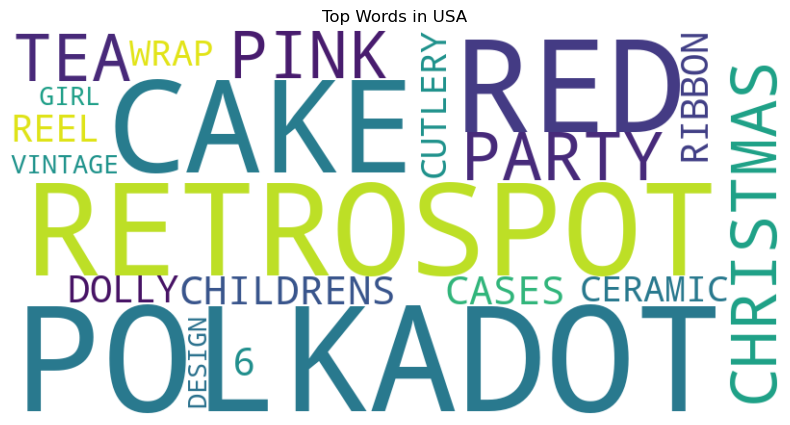

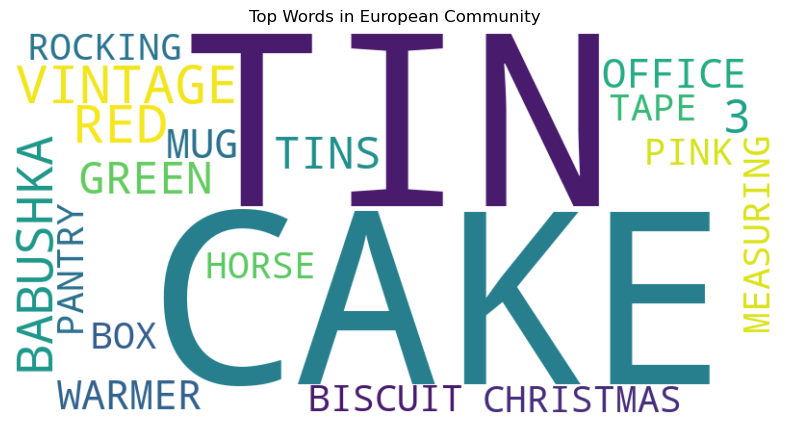

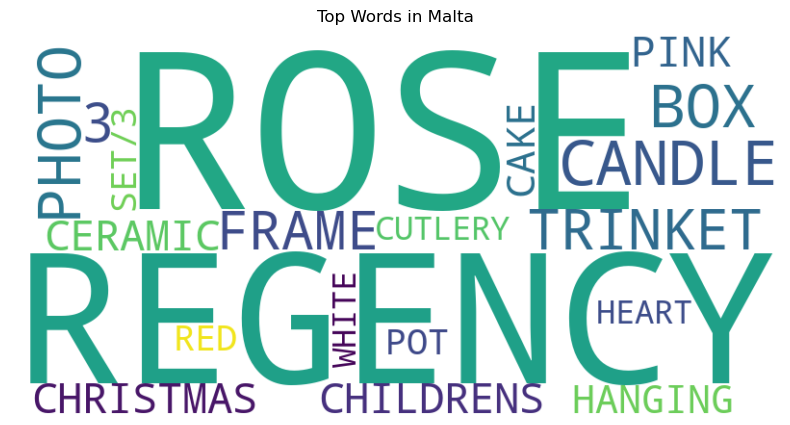

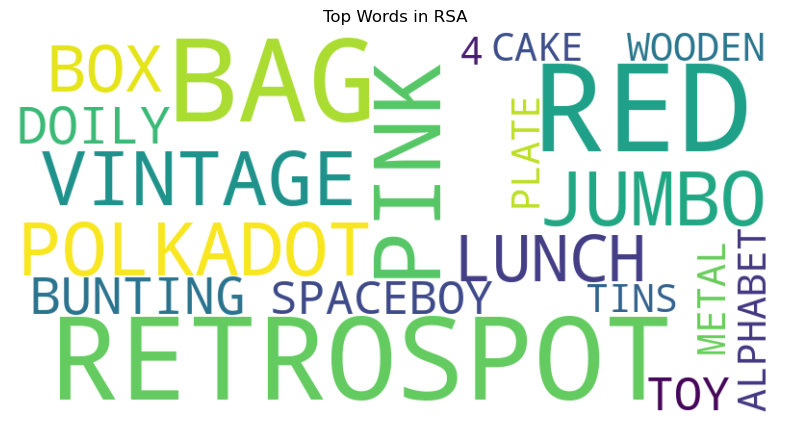

In [64]:
# Generate word clouds for each country
for country, word_counts in dictCount.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Top Words in {country}')
    plt.axis('off')
    plt.show()